# Predict the Diamond Prices

Project 1 for Udacity Predictive Analytics for Business Nanodegree.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

## Read and understand the data

In [2]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [3]:
df = df.drop(columns=["Unnamed: 0"])

## Step 2: Visualize the data

#### Plot 1 - Plot the data for the diamonds in the database, with carat on the x-axis and price on the y-axis. 

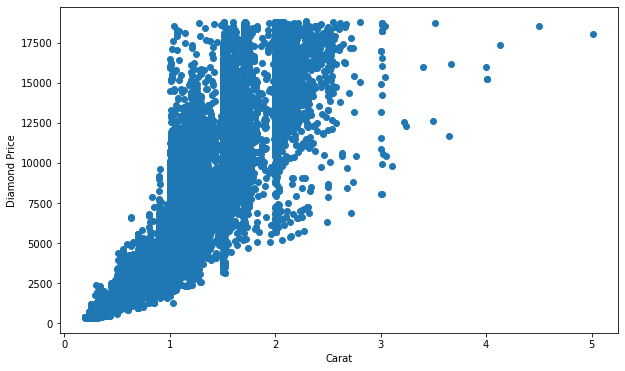

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['carat'], y = df['price'])
plt.xlabel("Carat")
plt.ylabel("Diamond Price")

plt.show()

### Encoding

Convert non-numerical data to numerical data

**Derive a relation and map into categories**

1. Compare prices per unit carat <br/>
2. Map according to the categorical values

In [5]:
df['price/wt']=df['price']/df['carat']
print(df.groupby('cut')['price/wt'].mean().sort_values())
print(df.groupby('color')['price/wt'].mean().sort_values())
print(df.groupby('clarity')['price/wt'].mean().sort_values())
df = df.drop(['price/wt'], axis=1)

cut
Fair         3769.610484
Good         3867.429167
Ideal        3919.607121
Very Good    4008.257672
Premium      4231.958268
Name: price/wt, dtype: float64
color
E    3806.437066
J    3826.455429
D    3943.992213
I    4006.772364
H    4014.065166
F    4134.934152
G    4165.128317
Name: price/wt, dtype: float64
clarity
I1      2798.092286
VVS1    3851.618744
SI1     3851.813147
SI2     4003.718128
VS2     4084.974978
VS1     4162.981030
VVS2    4194.280703
IF      4286.263857
Name: price/wt, dtype: float64


In [6]:
df['cut']=df['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
df['color']=df['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
df['clarity']=df['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})

### Find the features correlation

`carat` is the most correlated feature

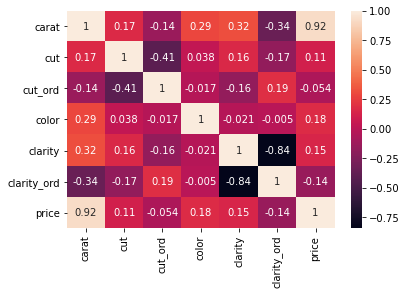

In [7]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
df['cut/wt']=df['cut']/df['carat']
df['color/wt']=df['color']/df['carat']
df['clarity/wt']=df['clarity']/df['carat']
df = df.drop(['cut','color','clarity'], axis=1)

In [9]:
df.head()

,carat,cut_ord,clarity_ord,price,cut/wt,color/wt,clarity/wt
0,0.51,4,4,1749,9.803922,5.882353,7.843137
1,2.25,1,1,7069,1.777778,1.777778,2.222222
2,0.70,3,5,2757,4.285714,1.428571,8.571429
3,0.47,2,4,1243,4.255319,6.382979,8.510638
4,0.30,5,7,789,3.333333,13.333333,3.333333


## Regression (ML Prediction)

1. Split y = what we want to predict and X = features <br/>
2. Split into train, test data <br/>
3. Run prediction by using linear regression and decision tree regressor.

In [10]:
X = df.drop(columns=["price"])
y = df["price"]

In [11]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

In [12]:
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

Rsquare=lr.score(X_test,y_test)
print("Rsquare: %f" %(Rsquare))

coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Variable']
coeff_df["Coeff"] = pd.Series(lr.coef_)
coeff_df.sort_values(by='Coeff', ascending=True)
print(coeff_df)
print("Intercept: %f" %(lr.intercept_))

mae = mean_absolute_error(y_test,y_pred_lr)
print("mae: %f" %(mae))

rmse=np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("rmse: %f" %(rmse))

Rsquare: 0.897304
      Variable        Coeff
0        carat  9242.379598
1      cut_ord   176.460105
2  clarity_ord   671.138869
3       cut/wt    29.593951
4     color/wt   -58.375763
5   clarity/wt   110.036154
Intercept: -7663.967514
mae: 826.984668
rmse: 1253.635620


In [13]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = random_state)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_dtr)
print("mae: %f" %(mae))

Rsquare=dtr.score(X_test,y_test)
print("Rsquare: %f" %(Rsquare))

rmse=np.sqrt(mean_squared_error(y_test,y_pred_dtr))
print("rmse: %f" %(rmse))

mae: 310.926501
Rsquare: 0.974167
rmse: 628.761591


#### Plot 2 - Plot the data for the diamonds for which you are predicting prices with carat on the x-axis and predicted price on the y-axis. 

C:\Users\hamzahf\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

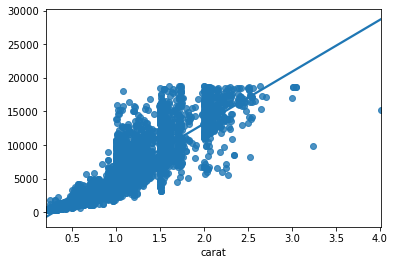

In [14]:
sns.regplot(X_test['carat'], y_pred_dtr, ci=None)

C:\Users\hamzahf\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color/wt'>

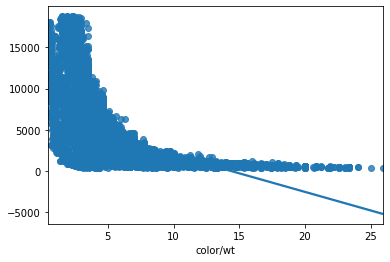

In [15]:
sns.regplot(X_test['color/wt'], y_pred_dtr, ci=None)

### Test the data with `new-diamonds.csv` file

In [16]:
df_new = pd.read_csv('new-diamonds.csv')
df_new.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


In [17]:
df_new = df_new.drop(columns=['Unnamed: 0'])

In [18]:
df_new['cut']=df_new['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
df_new['color']=df_new['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
df_new['clarity']=df_new['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})

In [19]:
df_new['cut/wt']=df_new['cut']/df_new['carat']
df_new['color/wt']=df_new['color']/df_new['carat']
df_new['clarity/wt']=df_new['clarity']/df_new['carat']
df_new = df_new.drop(['cut','color','clarity'], axis=1)

#### Run prediction and append new column called `Predicted Price`

In [20]:
df_new["Predicted Price"] = dtr.predict(df_new)
df_new["Predicted Price"] = df_new["Predicted Price"].round(2)
df_new

,carat,cut_ord,clarity_ord,cut/wt,color/wt,clarity/wt,Predicted Price
0,1.22,4,3,4.098361,3.278689,5.737705,6477.33
1,1.01,2,5,1.980198,3.960396,5.940594,5625.15
2,0.71,3,5,4.225352,8.450704,8.450704,2001.00
3,1.01,5,2,0.990099,1.980198,7.920792,4808.62
4,0.27,5,6,3.703704,18.518519,11.111111,511.50
...,...,...,...,...,...,...,...
2995,0.72,5,2,1.388889,4.166667,11.111111,2312.09
2996,1.09,4,5,4.587156,5.504587,5.504587,4589.00
2997,1.05,3,3,2.857143,3.809524,6.666667,4724.00
2998,0.70,1,3,5.714286,5.714286,10.000000,2236.00


In [21]:
df_new['cut']=df_new['cut/wt']*df_new['carat']
df_new['color']=df_new['color/wt']*df_new['carat']
df_new['clarity']=df_new['clarity/wt']*df_new['carat']
df_new

,carat,cut_ord,clarity_ord,cut/wt,color/wt,clarity/wt,Predicted Price,cut,color,clarity
0,1.22,4,3,4.098361,3.278689,5.737705,6477.33,5.0,4.0,7.0
1,1.01,2,5,1.980198,3.960396,5.940594,5625.15,2.0,4.0,6.0
2,0.71,3,5,4.225352,8.450704,8.450704,2001.00,3.0,6.0,6.0
3,1.01,5,2,0.990099,1.980198,7.920792,4808.62,1.0,2.0,8.0
4,0.27,5,6,3.703704,18.518519,11.111111,511.50,1.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2995,0.72,5,2,1.388889,4.166667,11.111111,2312.09,1.0,3.0,8.0
2996,1.09,4,5,4.587156,5.504587,5.504587,4589.00,5.0,6.0,6.0
2997,1.05,3,3,2.857143,3.809524,6.666667,4724.00,3.0,4.0,7.0
2998,0.70,1,3,5.714286,5.714286,10.000000,2236.00,4.0,4.0,7.0


In [22]:
df_new["cut"]=df_new["cut"].astype(int)
df_new["color"]=df_new["color"].astype(int)
df_new["clarity"]=df_new["clarity"].astype(int)
df_new.describe()

,carat,cut_ord,clarity_ord,cut/wt,color/wt,clarity/wt,Predicted Price,cut,color,clarity
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.795440,3.908667,4.119333,4.420657,5.781382,8.891564,3898.389270,2.579000,3.416667,5.474667
std,0.475891,1.108182,1.663535,3.826018,4.419630,5.454806,3963.683018,1.666739,1.811302,2.103370
min,0.210000,1.000000,1.000000,0.380228,0.487805,0.653595,336.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,1.923077,2.777778,4.968944,940.997500,1.000000,2.000000,4.000000
50%,0.700000,4.000000,4.000000,3.125000,4.285714,7.547170,2391.000000,2.000000,3.000000,6.000000
75%,1.030000,5.000000,5.000000,5.454545,7.500000,11.491173,5233.750000,4.000000,5.000000,7.000000
max,3.010000,5.000000,8.000000,23.809524,29.166667,38.095238,18593.000000,5.000000,7.000000,8.000000


In [23]:
df_new['cut']=df_new['cut'].map({0: "Ideal",
                                 1 :"Ideal", 
                                 2 :"Good", 
                                 3 : "Very Good",
                                 4 : "Fair",
                                 5 :"Premium"})
df_new['color']=df_new['color'].map({0: "E",
                                     1:"E",
                                     2: "D",
                                     3:"F", 
                                     4: "G", 
                                     5:"H",
                                     6: "I",
                                     7:"J"})
df_new['clarity']=df_new['clarity'].map({0:"WS1",
                                         1:"WS1",
                                         2:"IF",
                                         3: "VVS2",
                                         4: "VS1",
                                         5:"I1",
                                         6:"VS2",
                                         7:"SI1",
                                         8: "SI2"})

In [24]:
df_new

,carat,cut_ord,clarity_ord,cut/wt,color/wt,clarity/wt,Predicted Price,cut,color,clarity
0,1.22,4,3,4.098361,3.278689,5.737705,6477.33,Fair,G,VS2
1,1.01,2,5,1.980198,3.960396,5.940594,5625.15,Good,G,VS2
2,0.71,3,5,4.225352,8.450704,8.450704,2001.00,Very Good,I,VS2
3,1.01,5,2,0.990099,1.980198,7.920792,4808.62,Ideal,D,SI2
4,0.27,5,6,3.703704,18.518519,11.111111,511.50,Ideal,H,VVS2
...,...,...,...,...,...,...,...,...,...,...
2995,0.72,5,2,1.388889,4.166667,11.111111,2312.09,Ideal,F,SI1
2996,1.09,4,5,4.587156,5.504587,5.504587,4589.00,Premium,I,VS2
2997,1.05,3,3,2.857143,3.809524,6.666667,4724.00,Very Good,G,SI1
2998,0.70,1,3,5.714286,5.714286,10.000000,2236.00,Fair,G,SI1


In [25]:
df_new = df_new.drop(columns=["cut/wt", "color/wt", "clarity/wt"])

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            3000 non-null   float64
 1   cut_ord          3000 non-null   int64  
 2   clarity_ord      3000 non-null   int64  
 3   Predicted Price  3000 non-null   float64
 4   cut              3000 non-null   object 
 5   color            3000 non-null   object 
 6   clarity          3000 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 164.2+ KB


### Step 3: Make a Recommendation

#### 1.	What price do you recommend the jewelry company to bid? Please explain how you arrived at that number.

See the `predicted-diamonds-price.csv` for full predicted price value and all the steps to arrive that predicted price is in this notebook.

In [27]:
df_new.to_csv("predicted-diamonds-price.csv")

### Step 2: Visualize the data

#### Plot 2 - Plot the data for the diamonds for which you are predicting prices with carat on the x-axis and predicted price on the y-axis. 

C:\Users\hamzahf\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='Predicted Price'>

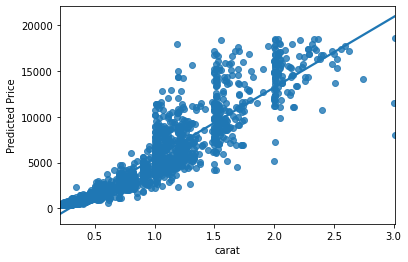

In [28]:
sns.regplot(df_new['carat'], df_new['Predicted Price'], ci=None)

#### 3.	What strikes you about this comparison? After seeing this plot, do you feel confident in the model’s ability to predict prices? 

Yes, because Rsquare: 0.974167 is achieved by using Decision Tree Regressor and the scattered values are almost straightly plotted.

### Step 1 - Understanding the model

#### 1.	According to the model, if a diamond is 1 carat heavier than another with the same cut, how much more should I expect to pay? Why?

In [29]:
df_new[df_new['carat']==0.5].describe()

,carat,cut_ord,clarity_ord,Predicted Price
count,62.0,62.000000,62.000000,62.000000
mean,0.5,3.532258,4.032258,1491.798226
std,0.0,1.237630,1.267083,314.231161
min,0.5,1.000000,2.000000,990.000000
25%,0.5,3.000000,3.000000,1260.822500
50%,0.5,4.000000,4.000000,1450.895000
75%,0.5,4.750000,5.000000,1698.060000
max,0.5,5.000000,7.000000,2448.290000


In [30]:
df_new[df_new['carat']==1.5].describe()

,carat,cut_ord,clarity_ord,Predicted Price
count,38.0,38.000000,38.000000,38.000000
mean,1.5,3.184211,3.447368,9846.767368
std,0.0,1.035981,1.519199,3038.438088
min,1.5,1.000000,1.000000,4158.000000
25%,1.5,2.250000,2.000000,7733.452500
50%,1.5,3.000000,3.000000,9273.615000
75%,1.5,4.000000,5.000000,11270.747500
max,1.5,5.000000,6.000000,17203.000000


In [31]:
df_new[df_new['carat']==2.5].describe()

,carat,cut_ord,clarity_ord,Predicted Price
count,1.0,1.0,1.0,1.0
mean,2.5,2.0,5.0,16842.0
std,NaN,NaN,NaN,NaN
min,2.5,2.0,5.0,16842.0
25%,2.5,2.0,5.0,16842.0
50%,2.5,2.0,5.0,16842.0
75%,2.5,2.0,5.0,16842.0
max,2.5,2.0,5.0,16842.0


The average difference of 1 carat is (9846.77 - 1491.8) = 8354.90 and  (16842 - 9846.77) = 6995.23

I should expect to pay around 7000 to 8000 more.

### Step 1: Understanding the model

#### 2.	If you were interested in a 1.5 carat diamond with a Very Good cut (represented by a 3 in the model) and a VS2 clarity rating (represented by a 5 in the model), how much would the model predict you should pay for it?

In [32]:
cond1 = np.logical_and(df_new['carat'] == 1.5, df_new['cut'] == "Very Good")
cond2 = np.logical_and(cond1, df_new['clarity'] == "VS2")

df_new[cond2]

,carat,cut_ord,clarity_ord,Predicted Price,cut,color,clarity
1370,1.5,3,5,15262.50,Very Good,D,VS2
2890,1.5,3,5,7440.67,Very Good,J,VS2


The predicted price for color D is 15262.50 and for color J is 7440.67